# Quantum Machine Learning

In this tutorial we will learn how to implement various Quantum Machine Learning Models and will try to benchmark their progress and accuracy in doing a simple classification task.


--------------


This tutorial will contain some mathematical background on the QML models and we will test the QML model on a randomly generated data set and a dataset from High Energy Physics (CERN)

In [1]:
!pip install qiskit
!pip install pennylane

  Using cached qiskit-0.39.2-py3-none-any.whl
  Using cached qiskit_aer-0.11.1-cp37-cp37m-win_amd64.whl (24.3 MB)
  Using cached qiskit_ibmq_provider-0.19.2-py3-none-any.whl (240 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.0/1.0 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 2.4 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     -------------------------------------- 313.0/313.0 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Downloading the Data and the Preprocessing

The dataset can be found [here](https://figshare.com/articles/dataset/Training_and_testing_data_used_in_the_paper_An_equation-of-state-meter_of_QCD_transition_from_deep_learning_/5457220/1)



In [2]:
# do the basic imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('training_observables.csv', header=None)

In [4]:
# let's see the dataset
dataset

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0,0.0,0.493280,119.32780,0.026617,0.019539,0.001285,0.004125,-0.114632,-0.192545,...,0.001793,0.003997,0.008152,0.015164,0.025790,0.040464,0.059261,0.081969,0.108310,0.138916
1,1,0.0,0.499796,140.66150,0.027218,0.015303,0.017385,0.001732,1.389377,0.282950,...,0.000811,0.001750,0.003415,0.006048,0.009945,0.015720,0.024593,0.038424,0.059534,0.090801
2,2,0.0,0.503392,152.76870,0.011552,0.016412,0.004306,0.007357,-0.133998,0.223442,...,0.003183,0.006916,0.013742,0.025196,0.042973,0.068877,0.104854,0.153033,0.215902,0.298440
3,3,0.0,0.488244,123.84110,0.016648,0.007232,0.004221,0.001482,1.066655,0.425053,...,0.000763,0.001691,0.003347,0.005789,0.008923,0.013181,0.020897,0.036646,0.066004,0.117576
4,4,0.0,0.496821,130.78380,0.029870,0.034460,0.016352,0.001592,0.849569,-0.411059,...,0.000919,0.002004,0.003871,0.006358,0.008433,0.007623,0.003397,0.026416,0.078568,0.177591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22570,22570,1.0,0.495708,43.28272,0.031320,0.010866,0.007185,0.000848,-0.414526,-0.690625,...,0.000392,0.000845,0.001672,0.003088,0.005341,0.008532,0.012373,0.016067,0.018169,0.015897
22571,22571,1.0,0.536097,35.77644,0.089789,0.015850,0.006881,0.005601,-0.028845,0.934089,...,0.001865,0.003920,0.007764,0.015250,0.029065,0.051837,0.085413,0.130882,0.189289,0.264222
22572,22572,1.0,0.516989,40.66633,0.056547,0.031709,0.012869,0.007707,0.561080,0.025548,...,0.003741,0.007919,0.014907,0.025046,0.037916,0.052361,0.066622,0.078427,0.085027,0.082829
22573,22573,1.0,0.514398,48.36263,0.059926,0.013307,0.006346,0.004572,0.499208,-1.016149,...,0.002169,0.004623,0.008857,0.015174,0.023454,0.033371,0.044792,0.058167,0.075026,0.098845


Let us name every column of the dataset their desired value,(what they actually represent in the high energy physics realm)

In [5]:
# Every Feature name
header_list = {
    0 : 'number',
    1 : 'eos_type',
    2 :	'mean_pt',
    3 :	'dndy',
    4 :	'v2',
    5 :	'v3',
    6 :	'v4',
    7 : 'v5',
    8 :	'psi2',
    9 :	'psi3',
    10 : 'psi4',
    11 :	'psi5',
    12 :'ptspec_bin0',
    13 : 'ptspec_bin',
    14 : 'ptspec_bin2',
    15 :	'ptspec_bin3',
    16 : 'ptspec_bin4',
    17 :	'ptspec_bin5',
    18 :	'ptspec_bin6',
    19 :	'ptspec_bin7',
    20 :	'ptspec_bin8',
    21 : 	'ptspec_bin9',
    22 :	'ptspec_bin10',
    23 :	'ptspec_bin11',
    24 :	'ptspec_bin12',
    25 :	'ptspec_bin13',
    26 :	'ptspec_bin14',
    27 :	'v2_ptbin0',
    28 :	'v2_ptbin1',
    29 :	'v2_ptbin2',
    30 :	'v2_ptbin3',
    31 :	'v2_ptbin4',
    32 :	'v2_ptbin5',
    33 :	'v2_ptbin6',
    34 :	'v2_ptbin7',
    35 :	'v2_ptbin8',
    36 :	'v2_ptbin9',
    37 :	'v2_ptbin10',
    38 :	'v2_ptbin11',
    39 :	'v2_ptbin12',
    40 :	'v2_ptbin13',
    41 :	'v2_ptbin14',
    42 :	'v3_ptbin0',
    43 :	'v3_ptbin1',
    44 :	'v3_ptbin2',
    45 :	'v3_ptbin3',
    46 :	'v3_ptbin4',
    47 :	'v3_ptbin5',
    48 :	'v3_ptbin6',
    49 :	'v3_ptbin7',
    50 : 'v3_ptbin8',
    51 : 'v3_ptbin9',
    52 : 'v3_ptbin10',
    53 : 'v3_ptbin11',
    54 : 'v3_ptbin12',
    55 : 'v3_ptbin13',
    56 : 'v3_ptbin14',
    57 : 'v4_ptbin0',
    58 : 'v4_ptbin1',
    59 : 'v4_ptbin2',
    60 : 'v4_ptbin3',
    61 : 'v4_ptbin4',
    62 : 'v4_ptbin5',
    63 : 'v4_ptbin6',
    64 : 'v4_ptbin7',
    65 : 'v4_ptbin8',
    66 : 'v4_ptbin9',
    67 : 'v4_ptbin10',
    68 : 'v4_ptbin11',
    69 : 'v4_ptbin12',
    70 : 'v4_ptbin13',
    71 : 'v4_ptbin14',
    72 : 'v5_ptbin0',
    73 : 'v5_ptbin1',
    74 : 'v5_ptbin2',
    75 : 'v5_ptbin3',
    76 : 'v5_ptbin4',
    77 : 'v5_ptbin5',
    78 : 'v5_ptbin6',
    79 : 'v5_ptbin7',
    80 : 'v5_ptbin8',
    81 : 'v5_ptbin9',
    82 : 'v5_ptbin10',
    83 : 'v5_ptbin11',
    84 : 'v5_ptbin12',
    85 : 'v5_ptbin13',
    86 : 'v5_ptbin14'
}


In [6]:
dataset = dataset.rename(columns=header_list)
dataset.head(5)

,number,eos_type,mean_pt,dndy,v2,v3,v4,v5,psi2,psi3,...,v5_ptbin5,v5_ptbin6,v5_ptbin7,v5_ptbin8,v5_ptbin9,v5_ptbin10,v5_ptbin11,v5_ptbin12,v5_ptbin13,v5_ptbin14
0,0,0.0,0.493280,119.3278,0.026617,0.019539,0.001285,0.004125,-0.114632,-0.192545,...,0.001793,0.003997,0.008152,0.015164,0.025790,0.040464,0.059261,0.081969,0.108310,0.138916
1,1,0.0,0.499796,140.6615,0.027218,0.015303,0.017385,0.001732,1.389377,0.282950,...,0.000811,0.001750,0.003415,0.006048,0.009945,0.015720,0.024593,0.038424,0.059534,0.090801
2,2,0.0,0.503392,152.7687,0.011552,0.016412,0.004306,0.007357,-0.133998,0.223442,...,0.003183,0.006916,0.013742,0.025196,0.042973,0.068877,0.104854,0.153033,0.215902,0.298440
3,3,0.0,0.488244,123.8411,0.016648,0.007232,0.004221,0.001482,1.066655,0.425053,...,0.000763,0.001691,0.003347,0.005789,0.008923,0.013181,0.020897,0.036646,0.066004,0.117576
4,4,0.0,0.496821,130.7838,0.029870,0.034460,0.016352,0.001592,0.849569,-0.411059,...,0.000919,0.002004,0.003871,0.006358,0.008433,0.007623,0.003397,0.026416,0.078568,0.177591


In [7]:
dataset = dataset.drop(['number'], axis = 1)
dataset

,eos_type,mean_pt,dndy,v2,v3,v4,v5,psi2,psi3,psi4,...,v5_ptbin5,v5_ptbin6,v5_ptbin7,v5_ptbin8,v5_ptbin9,v5_ptbin10,v5_ptbin11,v5_ptbin12,v5_ptbin13,v5_ptbin14
0,0.0,0.493280,119.32780,0.026617,0.019539,0.001285,0.004125,-0.114632,-0.192545,0.604534,...,0.001793,0.003997,0.008152,0.015164,0.025790,0.040464,0.059261,0.081969,0.108310,0.138916
1,0.0,0.499796,140.66150,0.027218,0.015303,0.017385,0.001732,1.389377,0.282950,0.155580,...,0.000811,0.001750,0.003415,0.006048,0.009945,0.015720,0.024593,0.038424,0.059534,0.090801
2,0.0,0.503392,152.76870,0.011552,0.016412,0.004306,0.007357,-0.133998,0.223442,-0.593591,...,0.003183,0.006916,0.013742,0.025196,0.042973,0.068877,0.104854,0.153033,0.215902,0.298440
3,0.0,0.488244,123.84110,0.016648,0.007232,0.004221,0.001482,1.066655,0.425053,-0.017385,...,0.000763,0.001691,0.003347,0.005789,0.008923,0.013181,0.020897,0.036646,0.066004,0.117576
4,0.0,0.496821,130.78380,0.029870,0.034460,0.016352,0.001592,0.849569,-0.411059,0.742171,...,0.000919,0.002004,0.003871,0.006358,0.008433,0.007623,0.003397,0.026416,0.078568,0.177591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22570,1.0,0.495708,43.28272,0.031320,0.010866,0.007185,0.000848,-0.414526,-0.690625,0.623115,...,0.000392,0.000845,0.001672,0.003088,0.005341,0.008532,0.012373,0.016067,0.018169,0.015897
22571,1.0,0.536097,35.77644,0.089789,0.015850,0.006881,0.005601,-0.028845,0.934089,0.126117,...,0.001865,0.003920,0.007764,0.015250,0.029065,0.051837,0.085413,0.130882,0.189289,0.264222
22572,1.0,0.516989,40.66633,0.056547,0.031709,0.012869,0.007707,0.561080,0.025548,0.430158,...,0.003741,0.007919,0.014907,0.025046,0.037916,0.052361,0.066622,0.078427,0.085027,0.082829
22573,1.0,0.514398,48.36263,0.059926,0.013307,0.006346,0.004572,0.499208,-1.016149,0.443735,...,0.002169,0.004623,0.008857,0.015174,0.023454,0.033371,0.044792,0.058167,0.075026,0.098845


Since the number of qubits required scales with the number of features , we'll try to keep it less 

In [8]:
important_features = [
    
    'eos_type',
	'v2',
	'v3',
 'psi2'
	   
]

# Best features according to reference


# The index of the best features in the header_list
important_features_id = np.array([
                         0,
                         4,
                         5,
                         8
                         
])

In [ ]:
# Convert it to numpy
dataset = dataset.to_numpy()

# Sepparating the label (Y) from the input features (X)
Y = dataset[:, 0]
Y = np.array(Y, dtype=int)
X = dataset[:, 1:]

# Sanity check
print(X.shape, Y.shape)

In [ ]:
# Separate data with label 0 and label 1

x_0 = X[Y == 0, :]
x_1 = X[Y == 1, :]
y_0 = Y[Y==0]
y_1 = Y[Y==1]

# Sanity check
print(x_0.shape, y_0.shape)
print(x_1.shape, y_1.shape)

(13434, 85) (13434,)
(9141, 85) (9141,)


In [12]:
# Split 50% of the data for training set and 50% for testing set

x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_0, y_0, test_size=0.5, random_state=2021)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.5, random_state=2021)

In [13]:
num_sample = 2000 # sample per class, total = 400

# Take the first 400 samples (500 from each class) from training set for X_train and Y_train
X_train = np.concatenate((x_train_0[:num_sample, :], x_train_1[:num_sample, :]), axis=0)
Y_train = np.concatenate((y_train_0[:num_sample], y_train_1[:num_sample]), axis=0)

# Take the first 1000 samples (500 from each class) from testing set for X_test and Y_test
X_test = np.concatenate((x_test_0[:num_sample, :], x_test_1[:num_sample, :]), axis=0)
Y_test = np.concatenate((y_test_0[:num_sample], y_test_1[:num_sample]), axis=0)

# Sanity Check
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4000, 85) (4000,)
(4000, 85) (4000,)


In [14]:
# Save the 400 subset as a txt file for future use so we don't need to load the whole dataset each time

np.savetxt('./QCD Dataset/X_train_4000.txt', X_train)
np.savetxt('./QCD Dataset/X_test_4000.txt', X_test)
np.savetxt('./QCD Dataset/Y_train_4000.txt', Y_train)
np.savetxt('./QCD Dataset/Y_test_4000.txt', Y_test)

In [15]:
# Code to load the saved subset

num_sample = 4000

X_train = np.loadtxt('./QCD Dataset/X_train_' + str(num_sample) + '.txt')
Y_train = np.loadtxt('./QCD Dataset/Y_train_' + str(num_sample) + '.txt')

X_test = np.loadtxt('./QCD Dataset/X_test_' + str(num_sample) + '.txt')
Y_test = np.loadtxt('./QCD Dataset/Y_test_' + str(num_sample) + '.txt')

# Sanity Check
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4000, 85) (4000,)
(4000, 85) (4000,)


In [16]:
# Take only the best 3 features

X_train = X_train[:, important_features_id[:3]]
X_test = X_test[:, important_features_id[:3]]

X_train.shape, X_test.shape

((4000, 3), (4000, 3))

In [17]:
X_train

array([[0.5727371 , 0.01961521, 0.01268726],
       [0.5031572 , 0.01139411, 0.00381489],
       [0.493949  , 0.00356587, 0.00591594],
       ...,
       [0.4378398 , 0.01194924, 0.00095084],
       [0.4434155 , 0.00266166, 0.00173735],
       [0.4957438 , 0.01178781, 0.00435343]])

In [18]:
X_test

array([[0.5949019 , 0.01120026, 0.0141949 ],
       [0.566241  , 0.0397017 , 0.0133887 ],
       [0.4653798 , 0.01649949, 0.00153883],
       ...,
       [0.5077894 , 0.00496598, 0.00181929],
       [0.5087496 , 0.00478042, 0.00345181],
       [0.5005321 , 0.00357258, 0.00427089]])

In [19]:
Y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [20]:
Y_test

array([0., 0., 0., ..., 1., 1., 1.])

Here you can see the Y data only includes string of $0$ and $1$s because its a case of binary classification.

## Quantum Support Vector Machine 

This implementation is based on [Schuld and Killoran(2018)](https://arxiv.org/abs/1803.07128)

We can basically replace the commonly used "variational approach" to quantum machine learning with a classical kernel method where the kernel is computed using a quantum device.

We will see how a kernel based method compares to that of a variational method.
We will combine pennylane with scikit-learn and then compare this whole with the variational quantum circuit trained via stochastic gradient descent using PyTorch

It's our hypotheses that **for quantum machine learning applications with many parameters, kernel-based training can be a great alternative to the variational approach to quantum machine learning**



## Some Mathematical Formulation

Let's consider a quantum model of the form :

$$ f(x) = \langle \phi(x) | \mathcal{M} | \phi(x)\rangle, $$

where $| \phi(x)\rangle$ is prepared by a fixed embedding circuit that encodes data input $x$ and $\mathcal{M}$ is an arbitrary observable. 


### Kernel Approach

Instead of trainig the $f$ variationally, we can often train an equivalent classical kernel method with a kernel executed on a quantum device. 
The quantum kernel is given by the mutual overlap of two data-encoding quantum states,

$$ \kappa(x, x') = | \langle \phi(x') | \phi(x)\rangle|^2. $$

hence its only based on data-encoding.

If the Loss function $L$ is the [hinge loss](https://en.wikipedia.org/wiki/Hinge_loss), the kernel method corresponds to a standard [support vector machine](https://en.wikipedia.org/wiki/Support-vector_machine) in the sense of a maximum-margin classifier.




### Note:

Specifically , we can replace variational method for qml with the kernel based training, if the optimization problem can be written as minimizing a cost of the form:

$$ \min_f  \lambda\;  \mathrm{tr}\{\mathcal{M}^2\} + \frac{1}{M}\sum_{m=1}^M L(f(x^m), y^m), $$

which is a regularized empirical risk with training data samples $(x^m, y^m)_{m=1\dots M}$ regularization strength $\lambda \in \mathbb{R}$ and the loss function $L$

## Initialization

We will do some basic but useful imports.

In [21]:
import numpy as np
import torch
from torch.nn.functional import relu

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor

import matplotlib.pyplot as plt

np.random.seed(42)

The technique we are going to use to embedd the data is the **angle-embedding**, which needs as many qubits as there are number of features. 

(There is a way to run for arbitrary number of features by just using one qubit, you can checkk that [here](https://twitter.com/MonitSharma1729/status/1577953151134552066?s=20&t=sWbk8aem3eM_Z2Z6YRQVQg))

In [22]:
n_qubits = len(X_train[0])
n_qubits

3

To implement the kernel, we need to prepare two states : $| \phi(x) \rangle$,$| \phi(x') \rangle$ on different sets of qubits with the help of angle-embedding routines $S(x), S(x^{\prime})$ and measure their overlap with a small routine called as [SWAP test](https://en.wikipedia.org/wiki/Swap_test)


-------------------------

What we can try further on is just take half the number of qubits to prepare $| \phi(x) \rangle$ and then apply the inverse embedding with $x^{\prime}$ on the same qubits. And finally measure the projector onto initial states.



------------------------------------


Let us verify that this gives us the kernel:

$$ \begin{split}\begin{align*}
    \langle 0..0 |S(x') S(x)^{\dagger} \mathcal{M} S(x')^{\dagger} S(x)  | 0..0\rangle &= \langle 0..0 |S(x') S(x)^{\dagger} |0..0\rangle \langle 0..0| S(x')^{\dagger} S(x)  | 0..0\rangle  \\
    &= |\langle 0..0| S(x')^{\dagger} S(x)  | 0..0\rangle |^2\\
    &= | \langle \phi(x') | \phi(x)\rangle|^2 \\
    &= \kappa(x, x').
\end{align*}\end{split} $$


All this thing applied together, we have our *quantum kernel evaluator*

In [23]:
dev_kernel = qml.device("default.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

Check whether evaluating the kernel of a data point and itself returns 1:

In [24]:
kernel(X_train[0], X_train[0])

tensor(1., requires_grad=True)

The way an SVM with a custom kernel is implemented in scikit-learn requires us to pass a function that computes a matrix of kernel evaluations for samples in two different datasets A, B. If A=B, this is the [Gram matrix](https://en.wikipedia.org/wiki/Gramian_matrix).

In [25]:
def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

Training the SVM optimizes internal parameters that basically weigh kernel functions. It is a breeze in scikit-learn, which is designed as a high-level machine learning library:

In [26]:
svm = SVC(kernel=kernel_matrix).fit(X_train, Y_train)

Let’s compute the accuracy on the test set.


In [ ]:
predictions = svm.predict(X_test)
accuracy_score(predictions, Y_test)

0.8275

How many times was the quantum device evaluated?

In [ ]:
dev_kernel.num_executions

320001

## How to get this number?

For $M$ training samples, the SVM must construct the $M \times M$ dimensional kernel gram -matrix for training. To classify $M_{pred}$ new samples, the SVM needs to evaluate the kernel at most $M_{pred}M$ times to get the pairwise distances between training vectors and test samples.

Let us formulate this as a function, which can be used at the end for the plot:

In [ ]:
def circuit_evals_kernel(n_data, split):
    """Compute how many circuit evaluations one needs for kernel-based
       training and prediction."""

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = M * M
    n_prediction = M * Mpred

    return n_training + n_prediction

In [ ]:
circuit_evals_kernel(n_data=len(X), split=len(X_train) /(len(X_train) + len(X_test)))

254826600

## Using the variational Approach

Using the variational principle of training, we can propose an ansatz for the variational circuit and train it directly. By increasing the number of layers of the ansatz, its expressivity increases. Depending on the ansatz, we may only search through a subspace of all measurements for the best candidate.

Remember from above, the variational training does not optimize exactly the same cost as the SVM, but we try to match them as closely as possible. For this we use a bias term in the quantum model, and train on the hinge loss.

We also explicitly use the parameter-shift differentiation method in the quantum node, since this is a method which works on hardware as well. While `diff_method='backprop'` or `diff_method='adjoint'` would reduce the number of circuit evaluations significantly, they are based on tricks that are only suitable for simulators, and can therefore not scale to more than a few dozen qubits

In [ ]:
dev_var = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev_var, interface="torch", diff_method="parameter-shift")
def quantum_model(x, params):
    """A variational quantum model."""

    # embedding
    AngleEmbedding(x, wires=range(n_qubits))

    # trainable measurement
    StronglyEntanglingLayers(params, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

def quantum_model_plus_bias(x, params, bias):
    """Adding a bias."""
    return quantum_model(x, params) + bias

def hinge_loss(predictions, targets):
    """Implements the hinge loss."""
    all_ones = torch.ones_like(targets)
    hinge_loss = all_ones - predictions * targets
    # trick: since the max(0,x) function is not differentiable,
    # use the mathematically equivalent relu instead
    hinge_loss = relu(hinge_loss)
    return hinge_loss

We now summarize the usual training and prediction steps into two functions similar to scikit-learn’s `fit()` and `predict()`. While it feels cumbersome compared to the one-liner used to train the kernel method, PennyLane—like other differentiable programming libraries—provides a lot more control over the particulars of training.

In our case, most of the work is to convert between numpy and torch, which we need for the differentiable `relu` function used in the hinge loss.

In [ ]:
def quantum_model_train(n_layers, steps, batch_size):
    """Train the quantum model defined above."""

    params = np.random.random((n_layers, n_qubits, 3))
    params_torch = torch.tensor(params, requires_grad=True)
    bias_torch = torch.tensor(0.0)

    opt = torch.optim.Adam([params_torch, bias_torch], lr=0.1)

    loss_history = []
    for i in range(steps):

        batch_ids = np.random.choice(len(X_train), batch_size)

        X_batch = X_train[batch_ids]
        y_batch = Y_train[batch_ids]

        X_batch_torch = torch.tensor(X_batch, requires_grad=False)
        y_batch_torch = torch.tensor(y_batch, requires_grad=False)

        def closure():
            opt.zero_grad()
            preds = torch.stack(
                [quantum_model_plus_bias(x, params_torch, bias_torch) for x in X_batch_torch]
            )
            loss = torch.mean(hinge_loss(preds, y_batch_torch))

            # bookkeeping
            current_loss = loss.detach().numpy().item()
            loss_history.append(current_loss)
            if i % 10 == 0:
                print("step", i, ", loss", current_loss)

            loss.backward()
            return loss

        opt.step(closure)

    return params_torch, bias_torch, loss_history


def quantum_model_predict(X_pred, trained_params, trained_bias):
    """Predict using the quantum model defined above."""

    p = []
    for x in X_pred:

        x_torch = torch.tensor(x)
        pred_torch = quantum_model_plus_bias(x_torch, trained_params, trained_bias)
        pred = pred_torch.detach().numpy().item()
        if pred > 0:
            pred = 1
        else:
            pred = -1

        p.append(pred)
    return p

Train the variational model and see how well we are doing on the test set.

step 0 , loss 0.8563191001013569
step 10 , loss 0.5615959659240116
step 20 , loss 0.45986020671957056
step 30 , loss 0.5095650636919851
step 40 , loss 0.6034720145867367
step 50 , loss 0.5017926799968434
step 60 , loss 0.2521063628336219
step 70 , loss 0.7007138524371598
step 80 , loss 0.3506985253461143
step 90 , loss 0.3508393315769453
accuracy on test set: 0.8


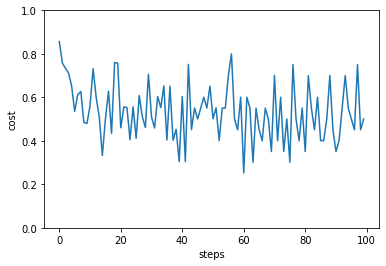

In [ ]:
n_layers = 2
batch_size = 20
steps = 100
trained_params, trained_bias, loss_history = quantum_model_train(n_layers, steps, batch_size)

pred_test = quantum_model_predict(X_test, trained_params, trained_bias)
print("accuracy on test set:", accuracy_score(pred_test, Y_test))

plt.plot(loss_history)
plt.ylim((0, 1))
plt.xlabel("steps")
plt.ylabel("cost")
plt.show()

How often was the device executed?

In [ ]:
dev_var.num_executions

76152

 In each optimization step, the variational circuit needs to compute the partial derivative of all trainable parameters for each sample in a batch. Using parameter-shift rules, we require roughly two circuit evaluations per partial derivative. Prediction uses only one circuit evaluation per sample.

We can formulate this as another function that will be used in the scaling plot below.

In [ ]:
def circuit_evals_variational(n_data, n_params, n_steps, shift_terms, split, batch_size):
    """Compute how many circuit evaluations are needed for
       variational training and prediction."""

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = n_params * n_steps * batch_size * shift_terms
    n_prediction = Mpred

    return n_training + n_prediction

This estimates the circuit evaluations in variational training as:

In [ ]:
circuit_evals_variational(
    n_data=len(X),
    n_params=len(trained_params.flatten()),
    n_steps=steps,
    shift_terms=2,
    split=len(X_train) /(len(X_train) + len(X_test)),
    batch_size=batch_size,
)

83287

It is important to note that while they are trained in a similar manner, the number of variational circuit evaluations differs from the number of neural network model evaluations in classical machine learning, which would be given by:

In [ ]:
def model_evals_nn(n_data, n_params, n_steps, split, batch_size):
    """Compute how many model evaluations are needed for neural
       network training and prediction."""

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = n_steps * batch_size
    n_prediction = Mpred

    return n_training + n_prediction

In each step of neural network training, and due to the clever implementations of automatic differentiation, the backpropagation algorithm can compute a gradient for all parameters in (more-or-less) a single run. For all we know at this stage, the no-cloning principle prevents variational circuits from using these tricks, which leads to `n_training` in `circuit_evals_variational` depending on the number of parameters, but not in `model_evals_nn`.

For the same example as used here, a neural network would therefore have far fewer model evaluations than both variational and kernel-based training:



In [ ]:
model_evals_nn(
    n_data=len(X),
    n_params=len(trained_params.flatten()),
    n_steps=steps,
    split=len(X_train) /(len(X_train) + len(X_test)),
    batch_size=batch_size,
)

13287

## Which Method scales the best?

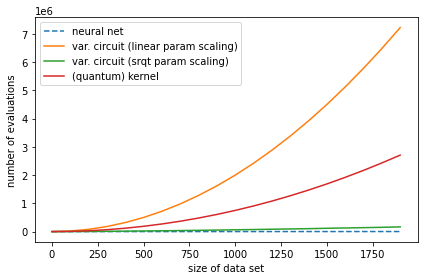

In [ ]:
variational_training1 = []
variational_training2 = []
kernelbased_training = []
nn_training = []
x_axis = range(0, 2000, 100)

for M in x_axis:

    var1 = circuit_evals_variational(
        n_data=M, n_params=M, n_steps=M,  shift_terms=2, split=0.75, batch_size=1
    )
    variational_training1.append(var1)

    var2 = circuit_evals_variational(
        n_data=M, n_params=round(np.sqrt(M)), n_steps=M,
        shift_terms=2, split=0.75, batch_size=1
    )
    variational_training2.append(var2)

    kernel = circuit_evals_kernel(n_data=M, split=0.75)
    kernelbased_training.append(kernel)

    nn = model_evals_nn(
        n_data=M, n_params=M, n_steps=M, split=0.75, batch_size=1
    )
    nn_training.append(nn)


plt.plot(x_axis, nn_training, linestyle='--', label="neural net")
plt.plot(x_axis, variational_training1, label="var. circuit (linear param scaling)")
plt.plot(x_axis, variational_training2, label="var. circuit (srqt param scaling)")
plt.plot(x_axis, kernelbased_training, label="(quantum) kernel")
plt.xlabel("size of data set")
plt.ylabel("number of evaluations")
plt.legend()
plt.tight_layout()
plt.show()